# Screening Study

In this notebook we evaluate the effect of different types of layouts for screening experiments.

We begin by importing required packages.

In [1]:
import numpy as np

# Our libraries
import libraries.disturbances as dt ## Plate effects
import libraries.normalization as nrm ## Error correction & normalization
import libraries.utilities as util ## Various utilities, like plotting
import libraries.screening as sc ## Functionality for screening experiments (like filling in a plate)

## Data Generation

Here you can specify the details about the experiment that will be used to fill in all the plates.

In [2]:
neg_control_mean = 100
pos_control_mean = 60
neg_stdev = 2
pos_stdev = 7

In [3]:
generated_plots_dir = 'generated-plots/PLAID-bioseminar-plots-2021/'

# Visual Examples

In [4]:
layout_dir = 'layouts/screening_manual_layouts/'
layout_file = 'plate_layout_border_20-10_01.npy'
norm_function = nrm.normalize_plate_linear

Now we place them on a plate, add a small random noise, apply plate effects error and correct them.

In [5]:
layout = np.load(layout_dir+layout_file)  
neg_control_id = np.max(layout)
pos_control_id = neg_control_id -1 

# Ideal plate without plate effects
ideal_plate = sc.fill_plate(layout,neg_control_id,pos_control_id,neg_control_mean,pos_control_mean,neg_stdev,pos_stdev)

### Plate without plate effects

Let's first look at what to expect from a plate with a border layout that does not have any plate effects.

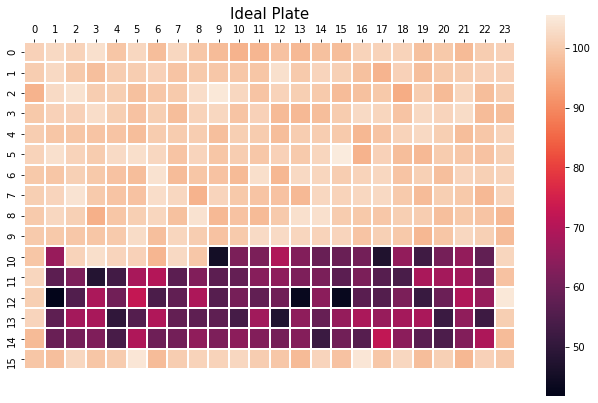

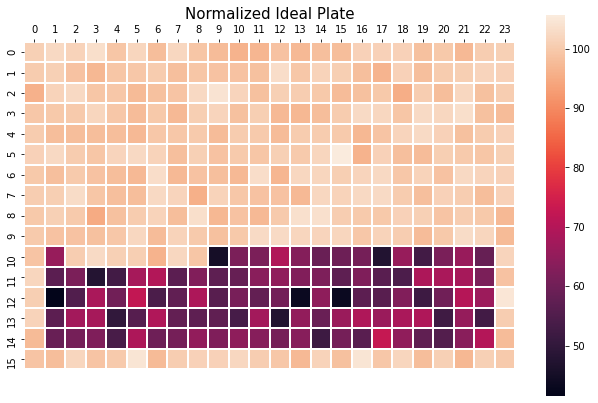

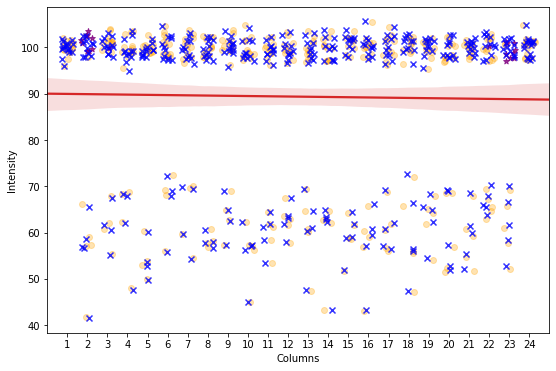

In [6]:
norm_plate = norm_function(ideal_plate,layout,neg_control_id)

util.plot_plate(ideal_plate, title="Ideal Plate")
util.plot_plate(norm_plate, title="Normalized Ideal Plate")
util.plot_well_series(ideal_plate,norm_plate,layout,neg_control_id,pos_control_id,filename=generated_plots_dir+"BORDER-none")


### Plate effect with a linear relationship to column number

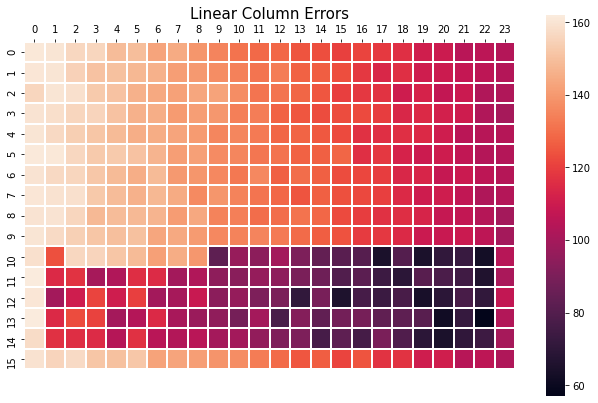

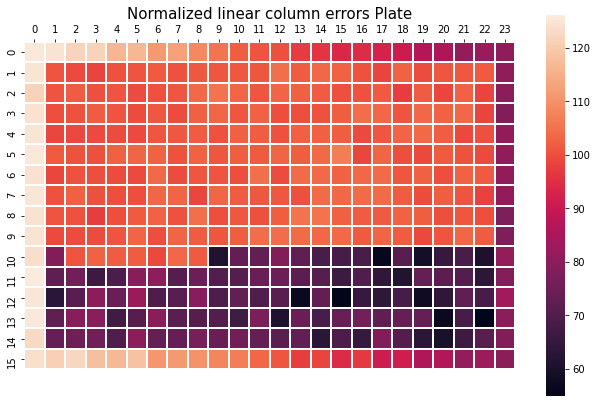

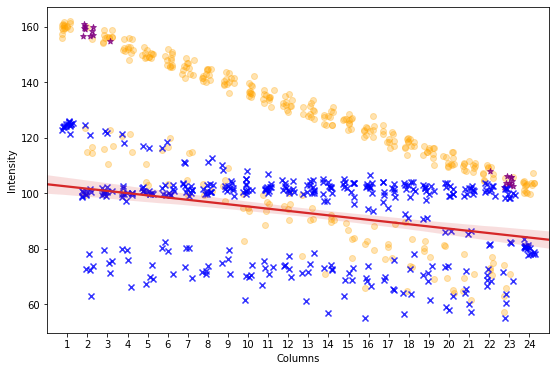

In [7]:
disturbed_plate = dt.add_linear_errors_to_left_columns(ideal_plate, 1.25)
norm_plate = norm_function(disturbed_plate,layout,neg_control_id)

util.plot_plate(disturbed_plate, title="Linear Column Errors")
util.plot_plate(norm_plate, title="Normalized linear column errors Plate")
util.plot_well_series(disturbed_plate,norm_plate,layout,neg_control_id,pos_control_id,filename=generated_plots_dir+'BORDER-columns-errors')


### Plate effect with a relationship to column number affecting only half of the plate

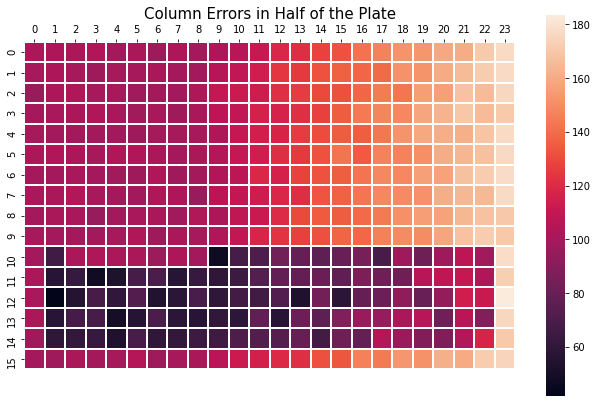

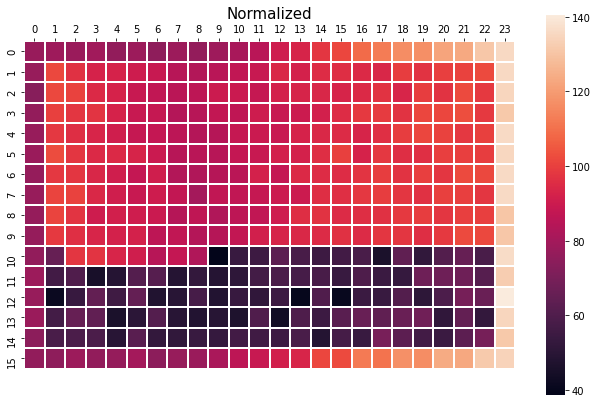

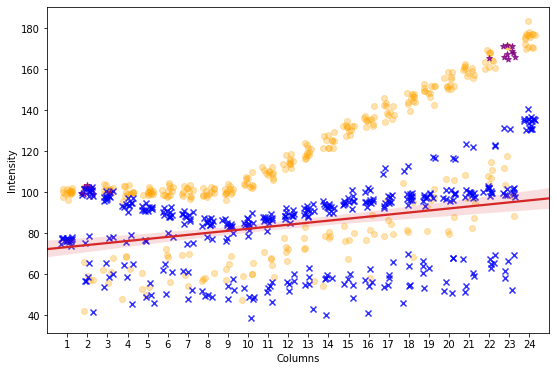

In [8]:
disturbed_plate = dt.add_errors_to_right_columns_half(ideal_plate, 0.05)
norm_plate = norm_function(disturbed_plate,layout,neg_control_id)

util.plot_plate(disturbed_plate, title="Column Errors in Half of the Plate")
util.plot_plate(norm_plate, title="Normalized")
util.plot_well_series(disturbed_plate,norm_plate,layout,neg_control_id,pos_control_id,filename=generated_plots_dir+'BORDER-columns-right-half-errors')


### Plate effect with a relationship to row number

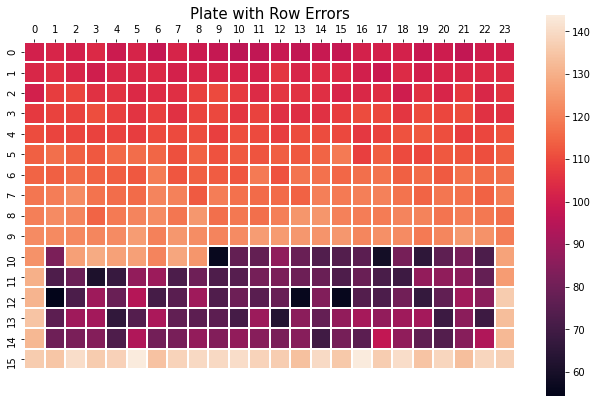

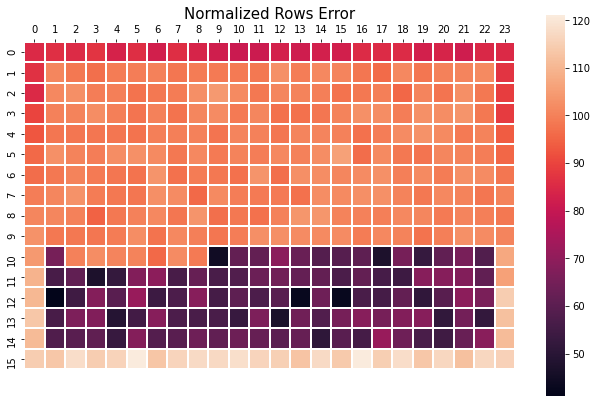

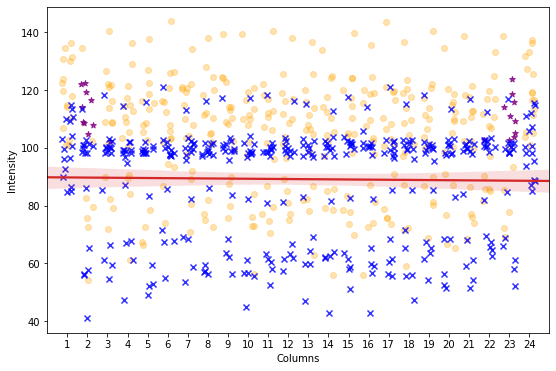

In [9]:
disturbed_plate = dt.add_errors_to_lower_rows(ideal_plate, 0.025)
norm_plate = norm_function(disturbed_plate,layout,neg_control_id)

util.plot_plate(disturbed_plate, title="Plate with Row Errors")
util.plot_plate(norm_plate, title="Normalized Rows Error")
util.plot_well_series(disturbed_plate,norm_plate,layout,neg_control_id,pos_control_id,filename=generated_plots_dir+'BORDER-rows-errors')


### Bowl-shaped plate effect

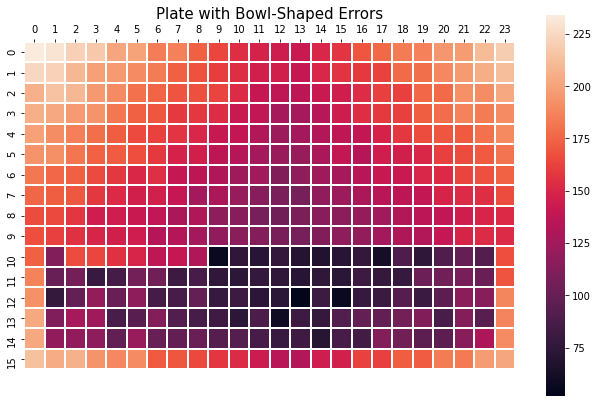

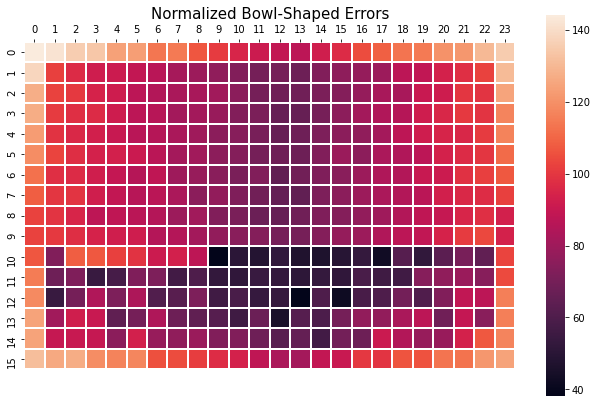

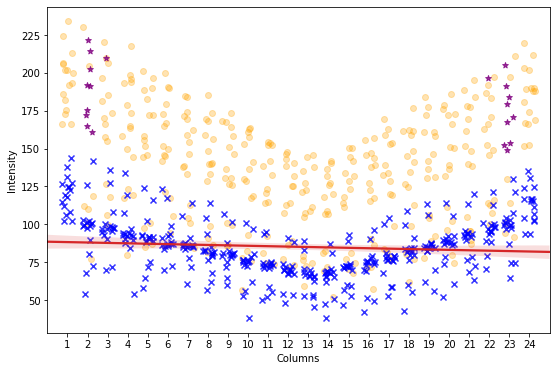

In [10]:
disturbed_plate = dt.add_bowlshaped_errors_nl(ideal_plate, 0.05)
norm_plate = norm_function(disturbed_plate,layout,neg_control_id)

util.plot_plate(disturbed_plate, title="Plate with Bowl-Shaped Errors")
util.plot_plate(norm_plate, title="Normalized Bowl-Shaped Errors")
util.plot_well_series(disturbed_plate,norm_plate,layout,neg_control_id,pos_control_id,filename=generated_plots_dir+'BORDER-bowlshape')

## Random Layout

We first specify the plate layout we want to visualize and the normalization & error correction function we want to use. 

In [11]:
layout_dir = 'layouts/screening_manual_layouts/'
layout_file = 'plate_layout_rand_20-10_02.npy'
norm_function = nrm.normalize_plate_lowess_2d

We load the layout and use it to create an ideal plate, that is, a plate without plate effects. Most likely, you do not need to modify anything here!

In [12]:
layout = np.load(layout_dir + layout_file)            
neg_control_id = np.max(layout)
pos_control_id = neg_control_id - 1 

# Ideal plate without plate effects
ideal_plate = sc.fill_plate(layout,neg_control_id,pos_control_id,neg_control_mean,pos_control_mean,neg_stdev,pos_stdev)

### Plate without plate effects

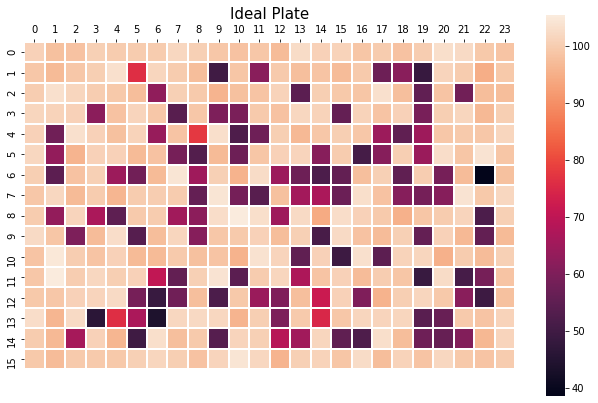

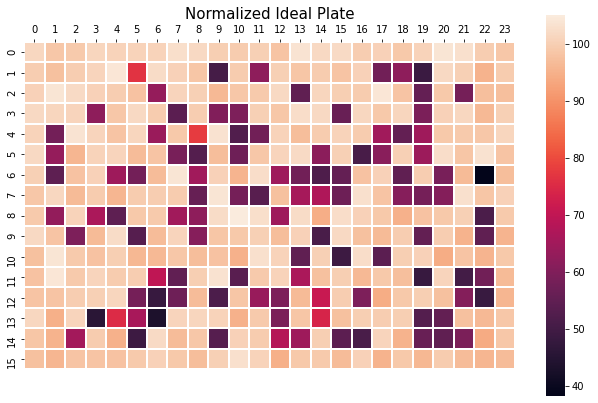

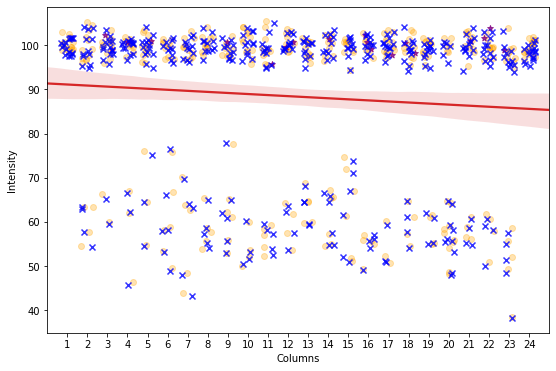

In [13]:
norm_plate = norm_function(ideal_plate,layout,neg_control_id)

util.plot_plate(ideal_plate, title="Ideal Plate")
util.plot_plate(norm_plate, title="Normalized Ideal Plate")
util.plot_well_series(ideal_plate,norm_plate,layout,neg_control_id,pos_control_id,order=1,filename=generated_plots_dir+'RANDOM-none')


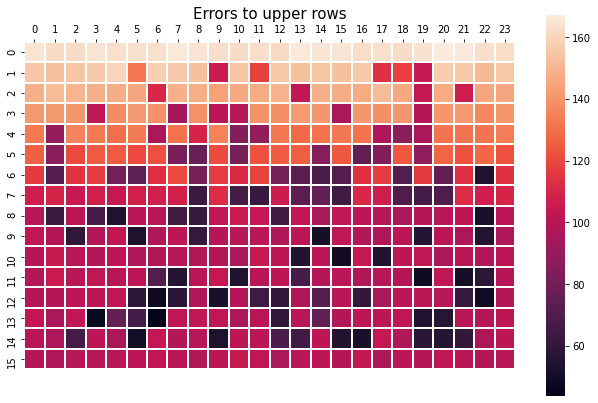

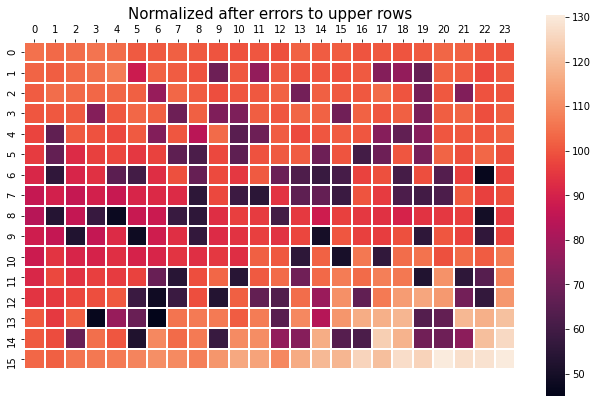

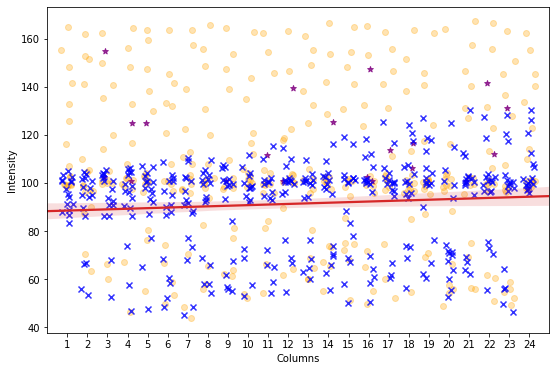

In [14]:
disturbed_plate = dt.add_linear_errors_to_upper_rows_half(ideal_plate, 4)
norm_plate = norm_function(disturbed_plate,layout,neg_control_id)

util.plot_plate(disturbed_plate, title="Errors to upper rows")
util.plot_plate(norm_plate, title="Normalized after errors to upper rows")
util.plot_well_series(disturbed_plate,norm_plate,layout,neg_control_id,pos_control_id,filename=generated_plots_dir+'RANDOM-rows-errors')


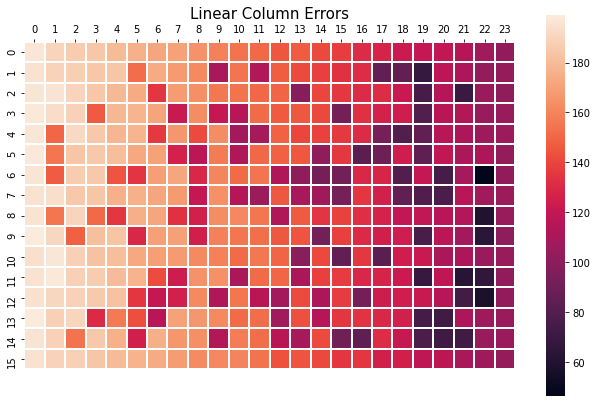

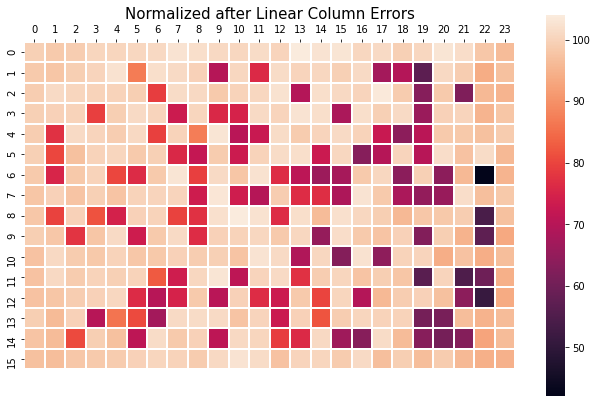

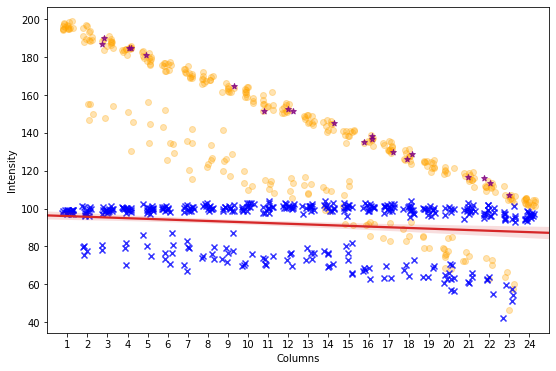

In [15]:
disturbed_plate = dt.add_linear_errors_to_left_columns(ideal_plate, 2)
norm_plate = norm_function(disturbed_plate,layout,neg_control_id)

util.plot_plate(disturbed_plate, title="Linear Column Errors")
util.plot_plate(norm_plate, title="Normalized after Linear Column Errors")
util.plot_well_series(disturbed_plate,norm_plate,layout,neg_control_id,pos_control_id,filename=generated_plots_dir+'RANDOM-columns-error')



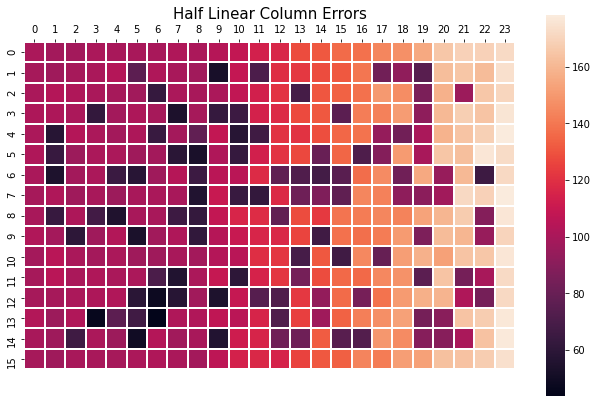

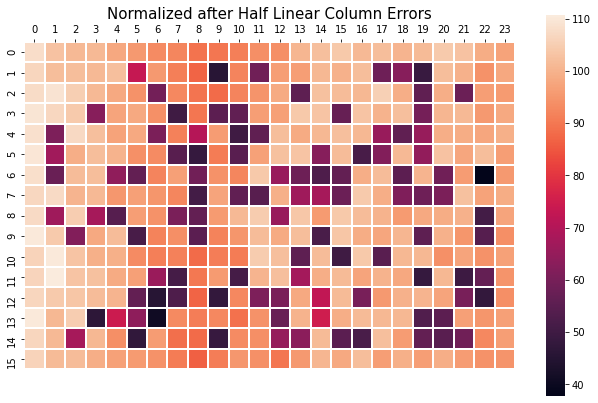

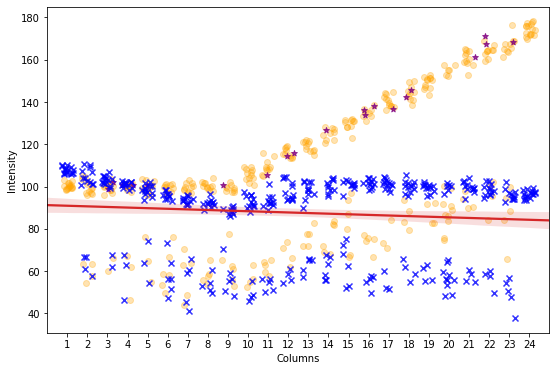

In [16]:
disturbed_plate = dt.add_errors_to_right_columns_half(ideal_plate, 0.05)
norm_plate = norm_function(disturbed_plate,layout,neg_control_id)

util.plot_plate(disturbed_plate, title="Half Linear Column Errors")
util.plot_plate(norm_plate, title="Normalized after Half Linear Column Errors")
util.plot_well_series(disturbed_plate,norm_plate,layout,neg_control_id,pos_control_id,order=1,filename=generated_plots_dir+'RANDOM-columns-half-errors')


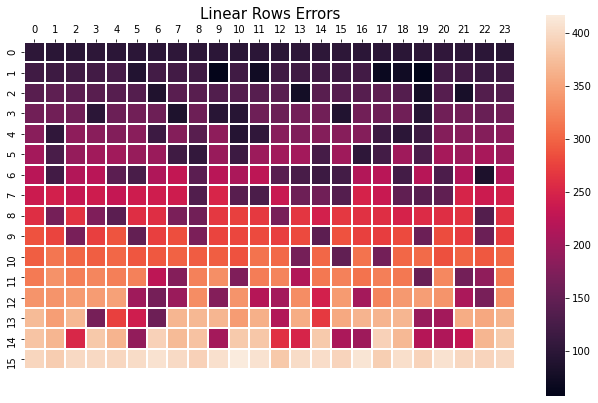

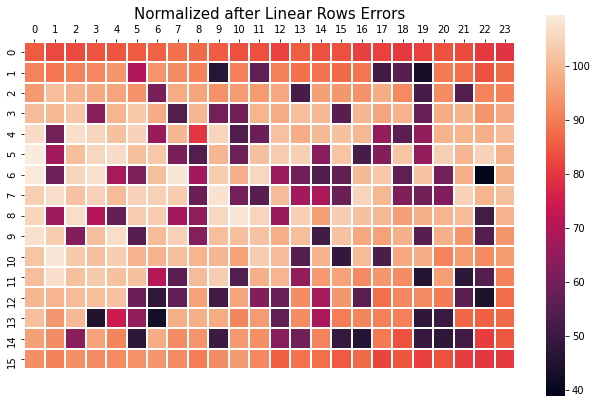

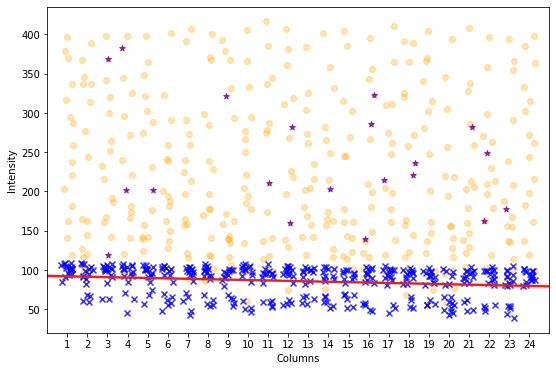

In [17]:
disturbed_plate = dt.add_errors_to_lower_rows(ideal_plate, 0.2)
norm_plate = norm_function(disturbed_plate,layout,neg_control_id)

util.plot_plate(disturbed_plate, title="Linear Rows Errors")
util.plot_plate(norm_plate, title="Normalized after Linear Rows Errors")
util.plot_well_series(disturbed_plate,norm_plate,layout,neg_control_id,pos_control_id,filename=generated_plots_dir+'RANDOM-rows-errors')


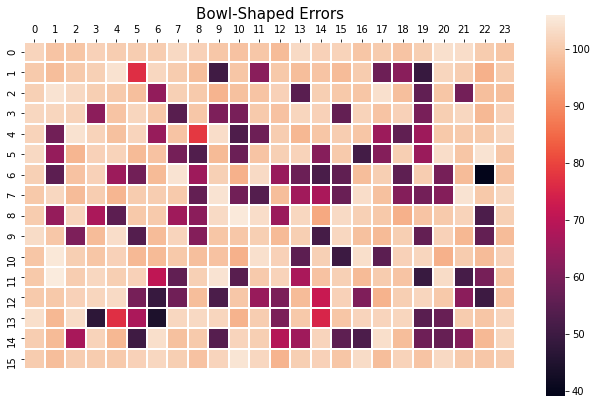

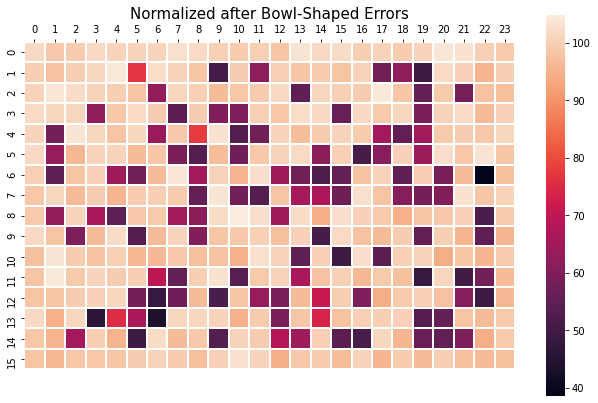

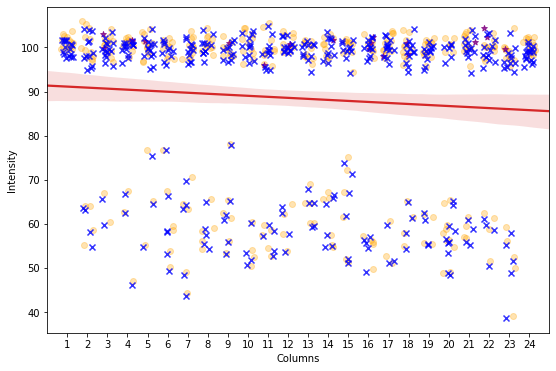

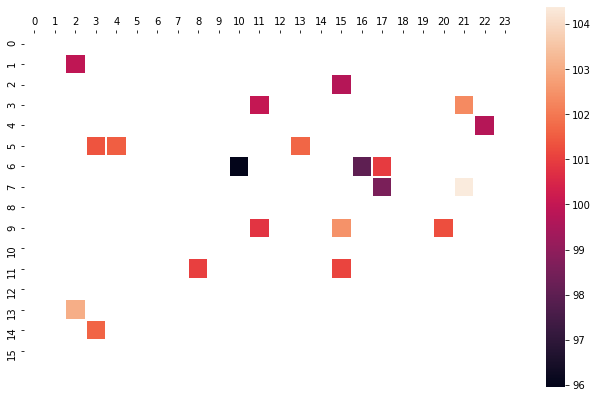

In [18]:
disturbed_plate = dt.add_bowlshaped_errors(ideal_plate, 0.05)
norm_plate = norm_function(disturbed_plate,layout,neg_control_id)

util.plot_plate(disturbed_plate, title="Bowl-Shaped Errors")
util.plot_plate(norm_plate, title="Normalized after Bowl-Shaped Errors")
util.plot_well_series(disturbed_plate,norm_plate,layout,neg_control_id,pos_control_id,order=1, filename=generated_plots_dir+'RANDOM-bowlshape-errors')

control_locations=util.get_controls_layout(layout)
util.plot_plate(disturbed_plate, title="", mask=np.array(1-control_locations,dtype=bool), filename=generated_plots_dir+"RANDOM-bowlshape-errors.png")



## PLAID Layout

In [19]:
layout_dir = 'layouts/screening_PLAID_layouts/'
layout_file = 'plate_layout_20-10_01.npy'

norm_function = nrm.normalize_plate_lowess_2d

In [20]:
layout = np.load(layout_dir+layout_file)  
neg_control_id = np.max(layout)
pos_control_id = neg_control_id - 1 

# Ideal plate without plate effects
ideal_plate = sc.fill_plate(layout,neg_control_id,pos_control_id,neg_control_mean,pos_control_mean,neg_stdev,pos_stdev)

### Plate without plate effects

Let's first look at what to expect from a plate with a border layout that does not have any plate effects.

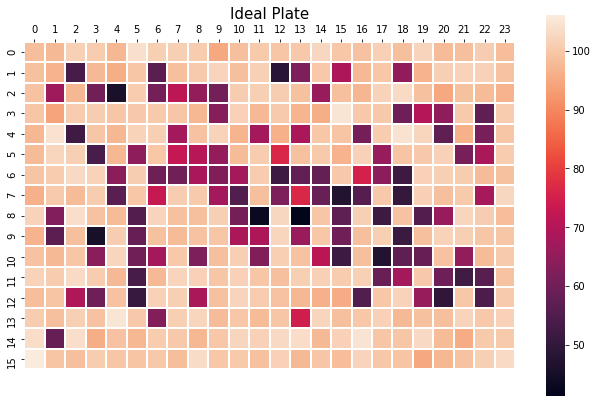

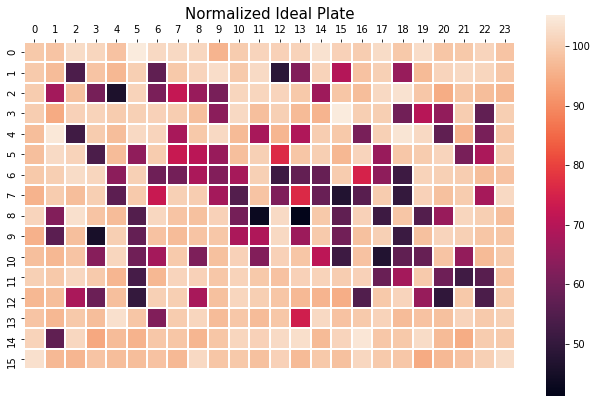

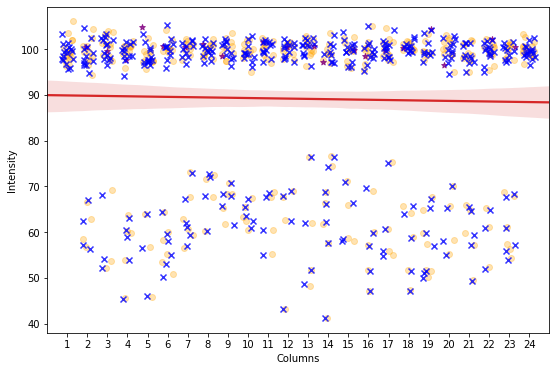

In [21]:
norm_plate = norm_function(ideal_plate,layout,neg_control_id)

util.plot_plate(ideal_plate, title="Ideal Plate")
util.plot_plate(norm_plate, title="Normalized Ideal Plate")
util.plot_well_series(ideal_plate,norm_plate,layout,neg_control_id,pos_control_id, filename=generated_plots_dir+'PLAID-none')

### Plate effect with a linear relationship to column number

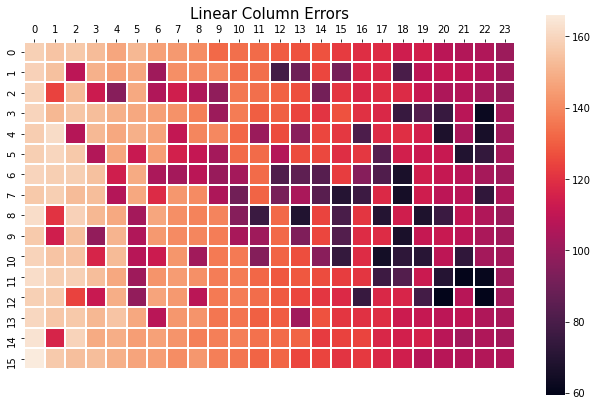

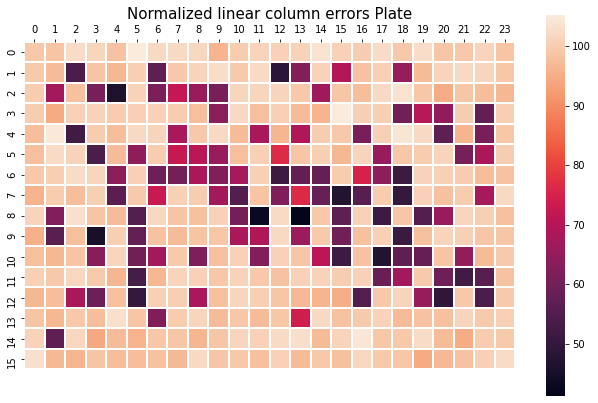

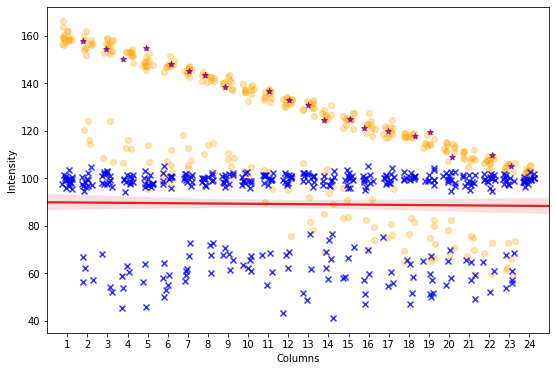

In [22]:
disturbed_plate = dt.add_linear_errors_to_left_columns(ideal_plate, 1.25)
norm_plate = norm_function(ideal_plate,layout,neg_control_id)

util.plot_plate(disturbed_plate, title="Linear Column Errors")
util.plot_plate(norm_plate, title="Normalized linear column errors Plate")
util.plot_well_series(disturbed_plate,norm_plate,layout,neg_control_id,pos_control_id, filename=generated_plots_dir+'PLAID-columns-error')


### Plate effect with a relationship to column number affecting only half of the plate

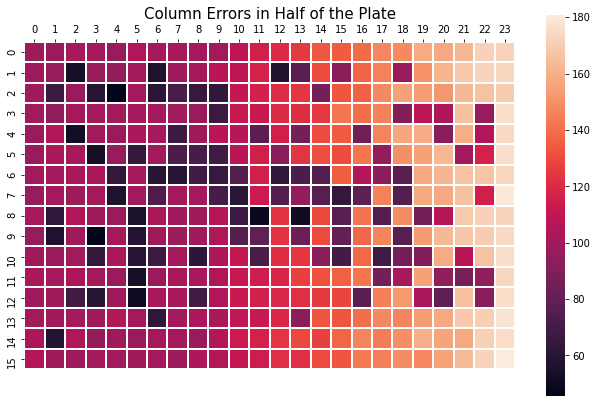

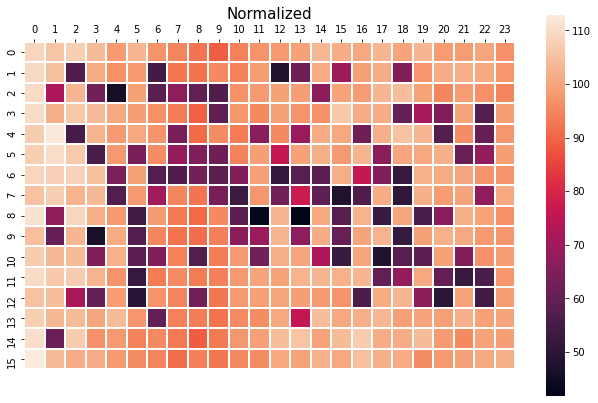

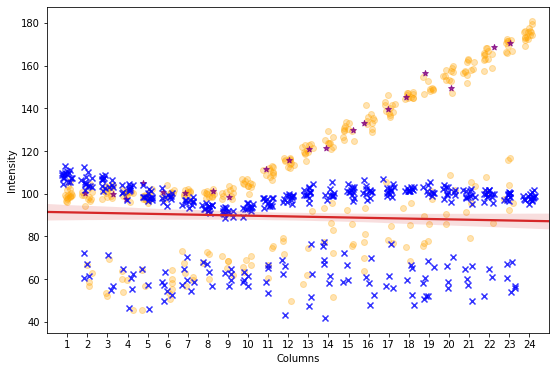

In [23]:
disturbed_plate = dt.add_errors_to_right_columns_half(ideal_plate, 0.05)
norm_plate = norm_function(disturbed_plate,layout,neg_control_id)

util.plot_plate(disturbed_plate, title="Column Errors in Half of the Plate")
util.plot_plate(norm_plate, title="Normalized")
util.plot_well_series(disturbed_plate,norm_plate,layout,neg_control_id,pos_control_id,filename=generated_plots_dir+'PLAID-columns-error-half')


### Plate effect with a relationship to row number

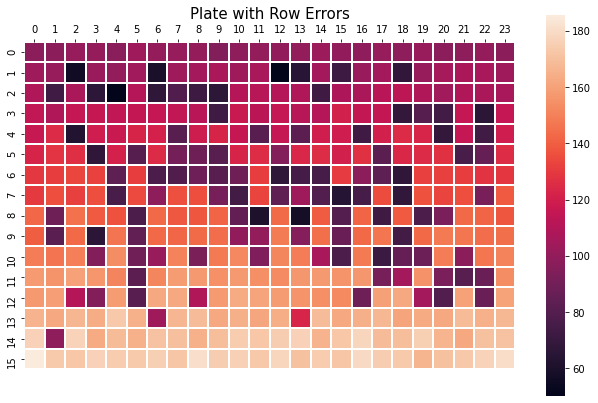

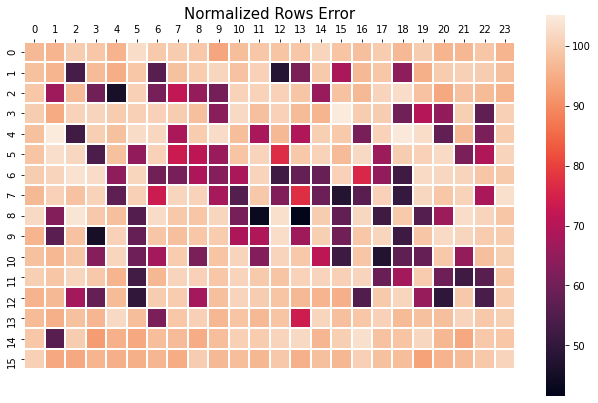

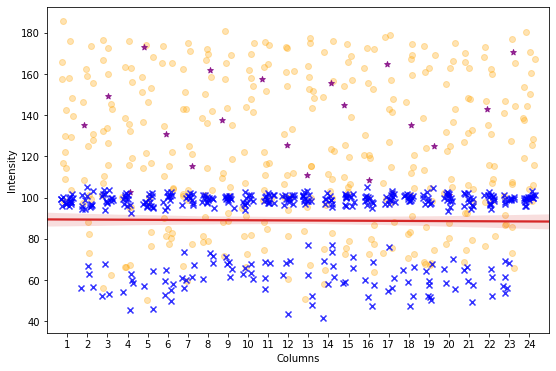

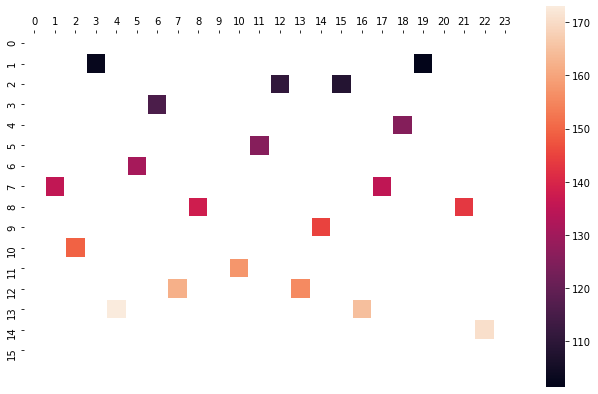

In [24]:
disturbed_plate = dt.add_errors_to_lower_rows(ideal_plate, 0.05)
norm_plate = norm_function(disturbed_plate,layout,neg_control_id)

util.plot_plate(disturbed_plate, title="Plate with Row Errors")
util.plot_plate(norm_plate, title="Normalized Rows Error")
util.plot_well_series(disturbed_plate,norm_plate,layout,neg_control_id,pos_control_id,filename=generated_plots_dir+'PLAID-rows-errors')

control_locations=util.get_controls_layout(layout)
util.plot_plate(disturbed_plate, title="", mask=np.array(1-control_locations,dtype=bool), filename = generated_plots_dir+"PLAID-controls-rows-errors.png")


### Bowl-shaped plate effect

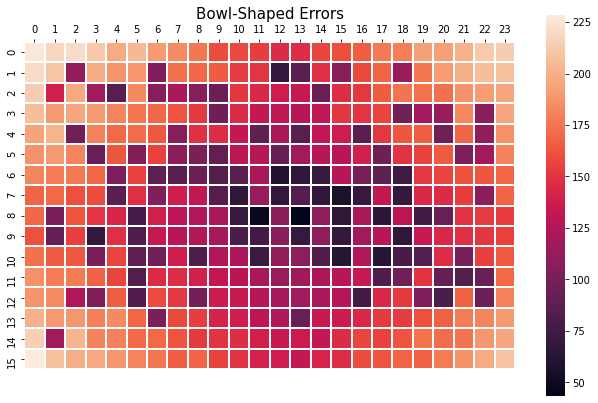

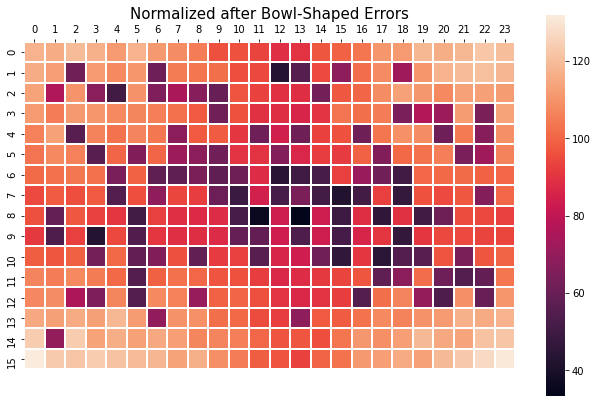

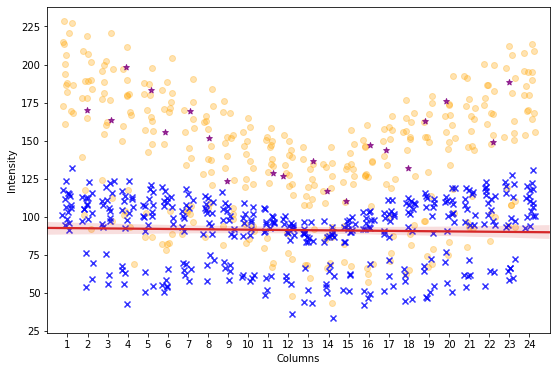

In [25]:
disturbed_plate = dt.add_bowlshaped_errors_nl(ideal_plate, 0.05)
norm_plate = norm_function(disturbed_plate,layout,neg_control_id)

util.plot_plate(disturbed_plate, title="Bowl-Shaped Errors")
util.plot_plate(norm_plate, title="Normalized after Bowl-Shaped Errors")
util.plot_well_series(disturbed_plate,norm_plate,layout,neg_control_id,pos_control_id,order=1,filename=generated_plots_dir+'PLAID-bowlshape',vmin=None,vmax=None)


# End of the presentation! :-)